# Week 1: Project Kick-off and Data Exploration

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"D:\Project\Table.csv",encoding='ISO-8859-1')
df

C:\Users\Vaamshikan M\AppData\Local\Temp\ipykernel_29736\3769619861.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"D:\Project\Table.csv",encoding='ISO-8859-1')


,BillNo,Itemname,Quantity,Present_Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [8]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [10]:
print('Dataset Overview: \n')
print(df.info())

Dataset Overview: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   BillNo        522064 non-null  object 
 1   Itemname      520609 non-null  object 
 2   Quantity      522064 non-null  int64  
 3   Present_Date  522064 non-null  object 
 4   Price         522064 non-null  float64
 5   CustomerID    388023 non-null  float64
 6   Country       522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None


In [12]:
Summary = df.describe()
print(Summary)

       Quantity     Price  CustomerID
count 522064.00 522064.00   388023.00
mean      10.09      3.83    15316.93
std      161.11     41.90     1721.85
min    -9600.00 -11062.06    12346.00
25%        1.00      1.25    13950.00
50%        3.00      2.08    15265.00
75%       10.00      4.13    16837.00
max    80995.00  13541.33    18287.00


In [14]:
shape=df.shape
print(shape)

(522064, 7)


In [16]:
missing_values = df.isnull().sum()
print("Missing values: \n", missing_values)


Missing values: 
 BillNo               0
Itemname          1455
Quantity             0
Present_Date         0
Price                0
CustomerID      134041
Country              0
dtype: int64


In [18]:
print('Unique Values: \n')
Unique_values=df.nunique()
print(Unique_values)

Unique Values: 

BillNo          21665
Itemname         4185
Quantity          690
Present_Date    19641
Price            1285
CustomerID       4297
Country            30
dtype: int64


In [20]:
print(df.columns.tolist())

['BillNo', 'Itemname', 'Quantity', 'Present_Date', 'Price', 'CustomerID', 'Country']


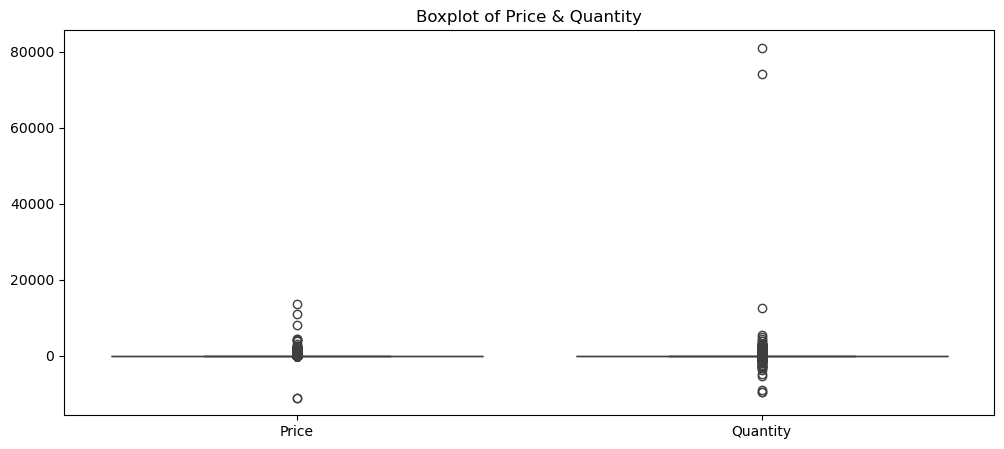

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[["Price", "Quantity"]])
plt.title("Boxplot of Price & Quantity")
plt.show()

In [23]:
Total_Sales = df.groupby('Itemname')['Quantity'].count().sort_values(ascending=False).head(10)
pd.set_option('display.max.rows',None)
print('Most Purchased Items: \n', Total_Sales)

Most Purchased Items: 
 Itemname
WHITE HANGING HEART T-LIGHT HOLDER    2269
JUMBO BAG RED RETROSPOT               2087
REGENCY CAKESTAND 3 TIER              1930
PARTY BUNTING                         1677
LUNCH BAG RED RETROSPOT               1570
ASSORTED COLOUR BIRD ORNAMENT         1465
SET OF 3 CAKE TINS PANTRY DESIGN      1360
PACK OF 72 RETROSPOT CAKE CASES       1328
LUNCH BAG  BLACK SKULL.               1315
NATURAL SLATE HEART CHALKBOARD        1246
Name: Quantity, dtype: int64


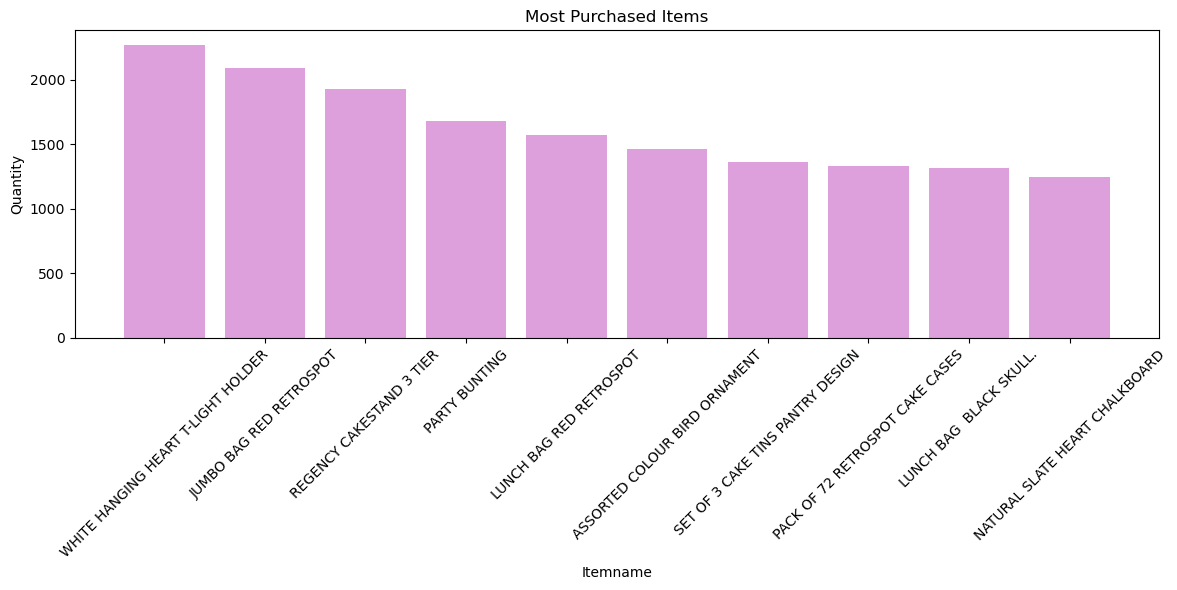

In [24]:
plt.figure(figsize=(12, 6))  
plt.bar(Total_Sales.index, Total_Sales.values, color='plum') 
plt.xlabel('Itemname')
plt.ylabel('Quantity')
plt.title('Most Purchased Items')
plt.xticks(rotation=45)  
plt.tight_layout()      
plt.show()


In [28]:
Total_Sales_Country = df.groupby('Country')['Quantity'].count().sort_values(ascending=False).head(10)
pd.set_option('display.max.rows',None)
print('Most Purchased Country: \n', Total_Sales_Country)

Most Purchased Country: 
 Country
United Kingdom    487622
Germany             9042
France              8408
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1967
Portugal            1501
Australia           1185
Norway              1072
Name: Quantity, dtype: int64


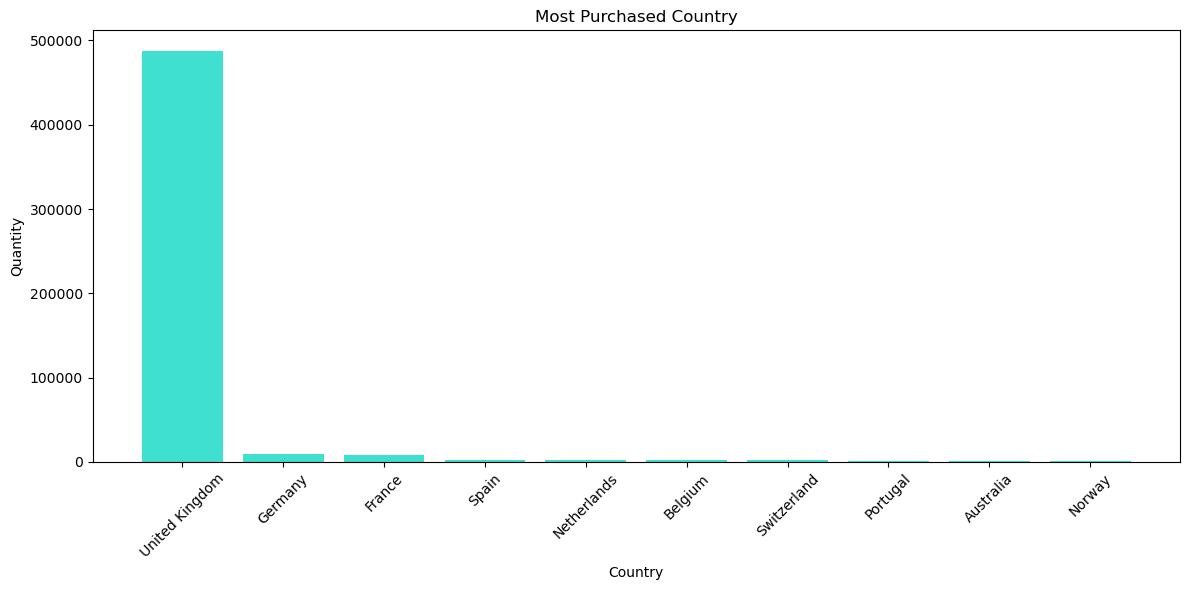

In [30]:
plt.figure(figsize=(12, 6))  
plt.bar(Total_Sales_Country.index, Total_Sales_Country.values,color='turquoise') 
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Most Purchased Country')
plt.xticks(rotation=45)  
plt.tight_layout()      
plt.show()

In [32]:
Total_Revenue_item = df.groupby('Itemname').apply(lambda x: (x['Quantity'] * x['Price']).sum()).sort_values(ascending=False).head()
print(Total_Revenue_item)

Itemname
DOTCOM POSTAGE                       206248.77
PAPER CRAFT , LITTLE BIRDIE          168469.60
REGENCY CAKESTAND 3 TIER             165689.19
WHITE HANGING HEART T-LIGHT HOLDER   102588.37
PARTY BUNTING                         97367.48
dtype: float64


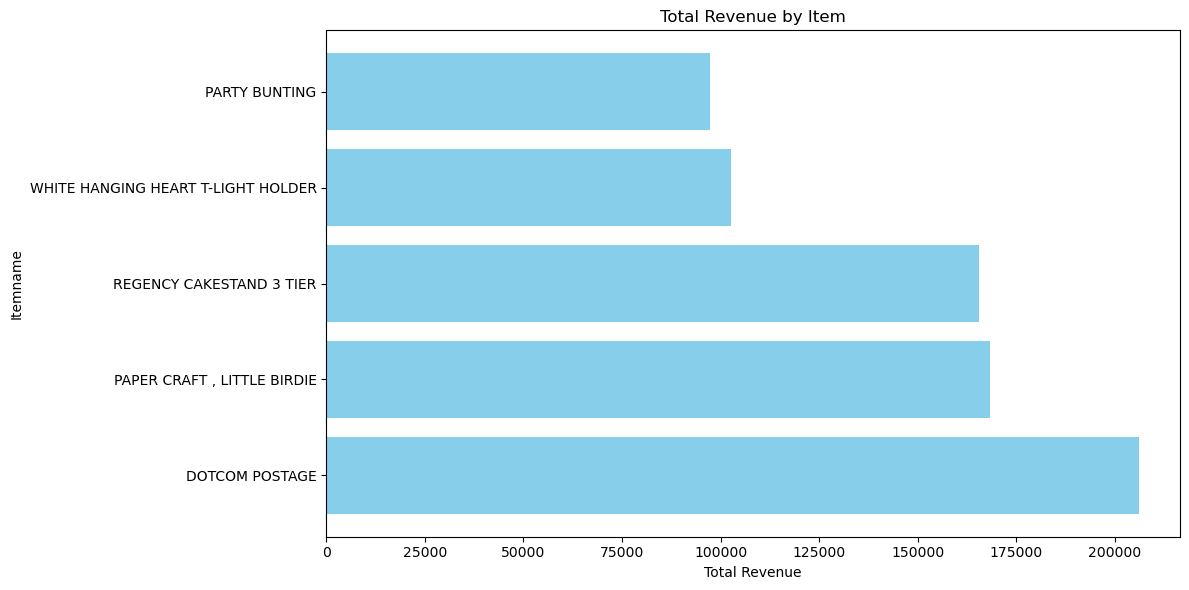

In [34]:
plt.figure(figsize=(12,6)) 
plt.barh(Total_Revenue_item.index, Total_Revenue_item.values, color='skyblue')
plt.xlabel("Total Revenue")
plt.ylabel("Itemname")
plt.title("Total Revenue by Item")
plt.tight_layout()
plt.show()


In [36]:
Total_Revenue = df.groupby('Country').apply(lambda x: (x['Quantity'] * x['Price']).sum()).sort_values(ascending=False)
print(Total_Revenue)

Country
United Kingdom         9003097.96
Netherlands             285446.34
Germany                 228867.14
France                  209715.11
Australia               138521.31
Spain                    61577.11
Switzerland              57089.90
Belgium                  41196.34
Sweden                   38378.33
Japan                    37416.37
Norway                   36165.44
Portugal                 33747.10
Singapore                21279.29
Italy                    17483.24
Hong Kong                15691.80
Austria                  10198.68
Israel                    8135.26
Poland                    7334.65
Greece                    4760.52
Unspecified               4749.79
Iceland                   4310.00
USA                       3580.39
Malta                     2725.59
United Arab Emirates      1902.28
Lebanon                   1693.88
Lithuania                 1661.06
Brazil                    1143.60
RSA                       1002.31
Bahrain                    754.14
Saudi 

C:\Users\Vaamshikan M\AppData\Local\Temp\ipykernel_29736\551378791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Country"], order=df["Country"].value_counts().index, palette="coolwarm")


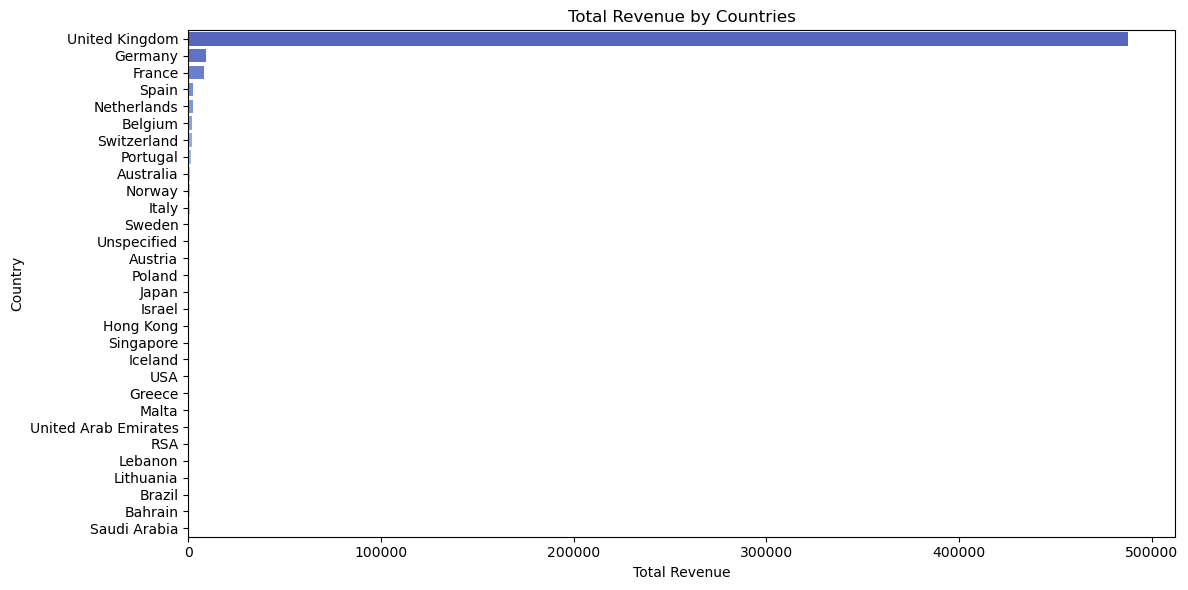

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(y=df["Country"], order=df["Country"].value_counts().index, palette="coolwarm")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.title("Total Revenue by Countries")
plt.tight_layout()
plt.show()

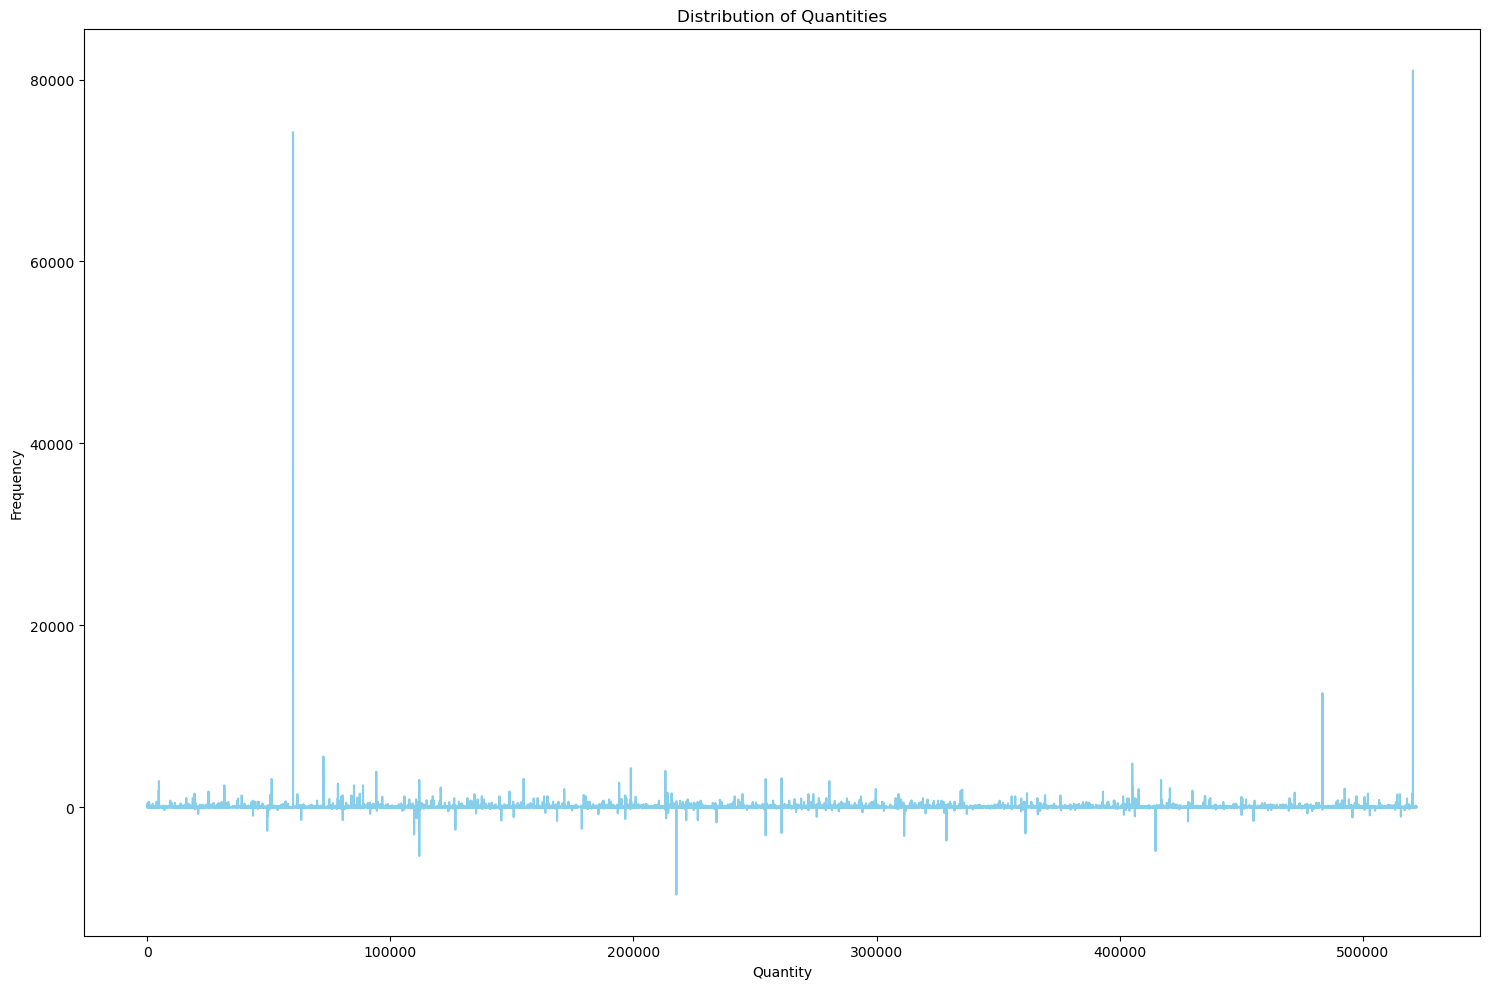

In [40]:
plt.figure(figsize=(15, 10))  # Set figure size first
plt.plot(df['Quantity'], color='skyblue')  # Use Quantity directly
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantities')
plt.tight_layout()
plt.show()


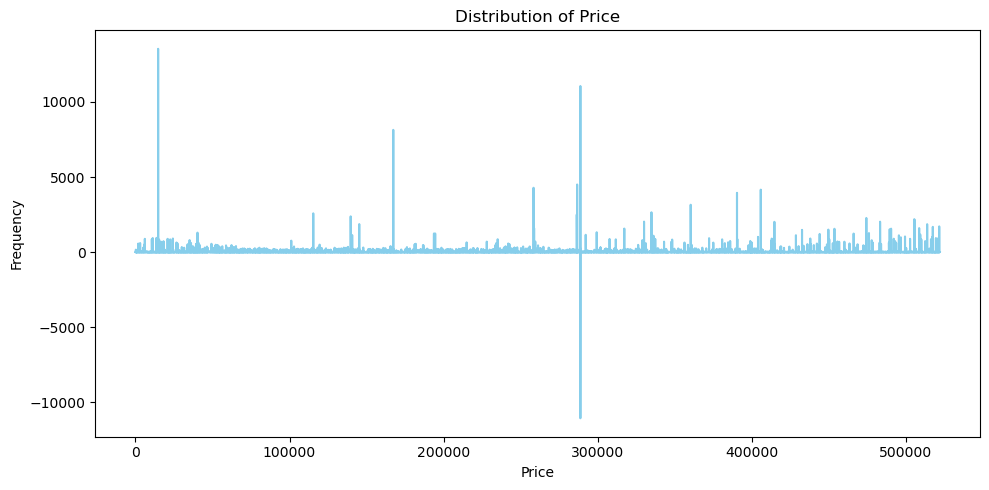

In [42]:
plt.figure(figsize=(10, 5))  
plt.plot(df['Price'], color='skyblue')  
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.tight_layout()
plt.show()

# Week 2: Data Cleaning and Transformation

In [45]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import numpy as np
import datetime
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
df

<Figure size 1200x600 with 0 Axes>

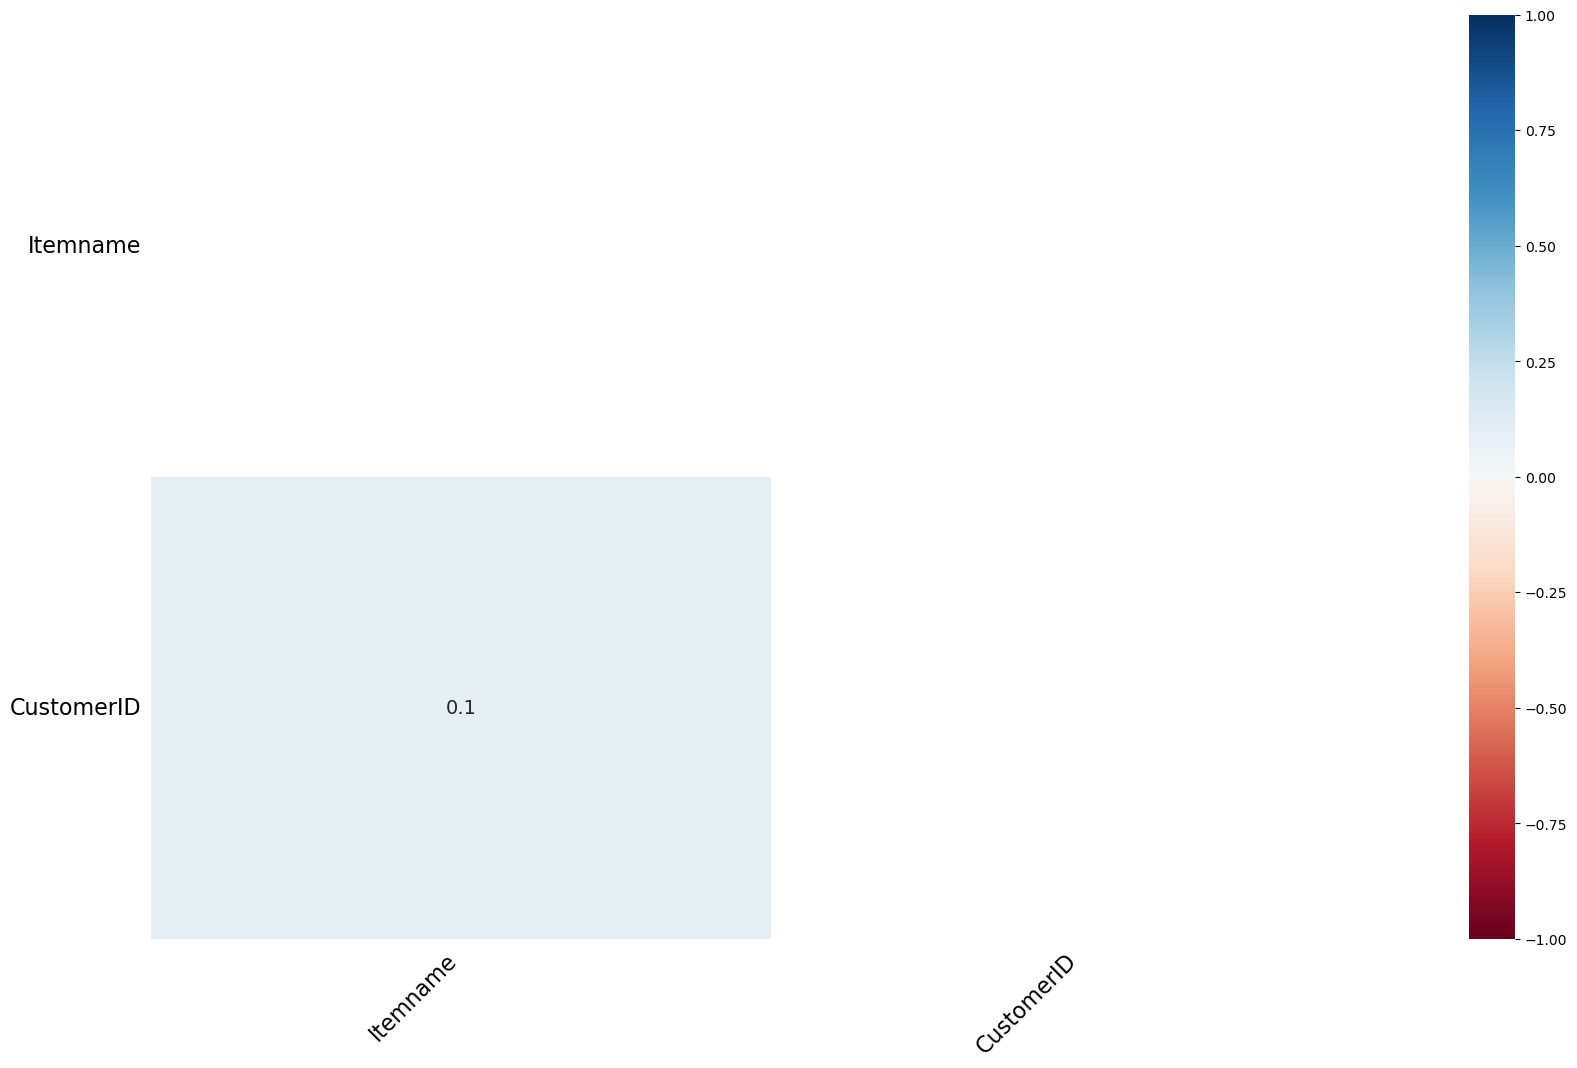

In [49]:
plt.figure(figsize=(12,6))
msno.heatmap(df)
plt.show()

In [ ]:
df["Present_Date"] = pd.to_datetime(df["Present_Date"])
df

In [13]:
df["Date"] = df["Present_Date"].dt.date
df["Time"] = df["Present_Date"].dt.time
df

,BillNo,Itemname,Quantity,Present_Date,Price,CustomerID,Country,Date,Time
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,08:26:00
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,08:26:00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
...,...,...,...,...,...,...,...,...,...
65253,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-12,12:50:00
65254,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-12,12:50:00
65255,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00
65256,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00


In [15]:
df["Quantity"].fillna(df["Quantity"].median(), inplace=True)
df["Price"].fillna(df["Price"].median(), inplace=True)
df["Itemname"].fillna(df["Itemname"].mode()[0], inplace=True)
df["Country"].fillna(df["Country"].mode()[0], inplace=True)
df

,BillNo,Itemname,Quantity,Present_Date,Price,CustomerID,Country,Date,Time
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,08:26:00
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,08:26:00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
...,...,...,...,...,...,...,...,...,...
65253,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-12,12:50:00
65254,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-12,12:50:00
65255,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00
65256,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00


In [18]:
df["Country"] = df["Country"].str.title()
df["Itemname"] = df["Itemname"].str.strip().str.lower()
df

,BillNo,Itemname,Quantity,Present_Date,Price,CustomerID,Country,Date,Time
0,536365,white hanging heart t-light holder,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12,08:26:00
1,536365,white metal lantern,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
2,536365,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12,08:26:00
3,536365,knitted union flag hot water bottle,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
4,536365,red woolly hottie white heart.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12,08:26:00
...,...,...,...,...,...,...,...,...,...
65253,581587,pack of 20 spaceboy napkins,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-12,12:50:00
65254,581587,children's apron dolly girl,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-12,12:50:00
65255,581587,childrens cutlery dolly girl,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00
65256,581587,childrens cutlery circus parade,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-12,12:50:00


In [20]:
df["CustomerID"] = pd.to_numeric(df["CustomerID"], errors="coerce").astype("Int64")
df

,BillNo,Itemname,Quantity,Present_Date,Price,CustomerID,Country,Date,Time
0,536365,white hanging heart t-light holder,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,2010-01-12,08:26:00
1,536365,white metal lantern,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,08:26:00
2,536365,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,2010-01-12,08:26:00
3,536365,knitted union flag hot water bottle,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,08:26:00
4,536365,red woolly hottie white heart.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,08:26:00
...,...,...,...,...,...,...,...,...,...
65253,581587,pack of 20 spaceboy napkins,12,2011-09-12 12:50:00,0.85,12680,France,2011-09-12,12:50:00
65254,581587,children's apron dolly girl,6,2011-09-12 12:50:00,2.10,12680,France,2011-09-12,12:50:00
65255,581587,childrens cutlery dolly girl,4,2011-09-12 12:50:00,4.15,12680,France,2011-09-12,12:50:00
65256,581587,childrens cutlery circus parade,4,2011-09-12 12:50:00,4.15,12680,France,2011-09-12,12:50:00


In [22]:
df = df[
    df.columns[:4].tolist() + ["Date", "Time"] + df.columns[4:-2].tolist()     
]
df

,BillNo,Itemname,Quantity,Present_Date,Date,Time,Price,CustomerID,Country
0,536365,white hanging heart t-light holder,6,2010-01-12 08:26:00,2010-01-12,08:26:00,2.55,17850,United Kingdom
1,536365,white metal lantern,6,2010-01-12 08:26:00,2010-01-12,08:26:00,3.39,17850,United Kingdom
2,536365,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2010-01-12,08:26:00,2.75,17850,United Kingdom
3,536365,knitted union flag hot water bottle,6,2010-01-12 08:26:00,2010-01-12,08:26:00,3.39,17850,United Kingdom
4,536365,red woolly hottie white heart.,6,2010-01-12 08:26:00,2010-01-12,08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...
65253,581587,pack of 20 spaceboy napkins,12,2011-09-12 12:50:00,2011-09-12,12:50:00,0.85,12680,France
65254,581587,children's apron dolly girl,6,2011-09-12 12:50:00,2011-09-12,12:50:00,2.10,12680,France
65255,581587,childrens cutlery dolly girl,4,2011-09-12 12:50:00,2011-09-12,12:50:00,4.15,12680,France
65256,581587,childrens cutlery circus parade,4,2011-09-12 12:50:00,2011-09-12,12:50:00,4.15,12680,France


In [24]:
df = df.drop_duplicates()
df

,BillNo,Itemname,Quantity,Present_Date,Date,Time,Price,CustomerID,Country
0,536365,white hanging heart t-light holder,6,2010-01-12 08:26:00,2010-01-12,08:26:00,2.55,17850,United Kingdom
1,536365,white metal lantern,6,2010-01-12 08:26:00,2010-01-12,08:26:00,3.39,17850,United Kingdom
2,536365,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2010-01-12,08:26:00,2.75,17850,United Kingdom
3,536365,knitted union flag hot water bottle,6,2010-01-12 08:26:00,2010-01-12,08:26:00,3.39,17850,United Kingdom
4,536365,red woolly hottie white heart.,6,2010-01-12 08:26:00,2010-01-12,08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...
65253,581587,pack of 20 spaceboy napkins,12,2011-09-12 12:50:00,2011-09-12,12:50:00,0.85,12680,France
65254,581587,children's apron dolly girl,6,2011-09-12 12:50:00,2011-09-12,12:50:00,2.10,12680,France
65255,581587,childrens cutlery dolly girl,4,2011-09-12 12:50:00,2011-09-12,12:50:00,4.15,12680,France
65256,581587,childrens cutlery circus parade,4,2011-09-12 12:50:00,2011-09-12,12:50:00,4.15,12680,France


# Week 3: Data Visualization and Apriori Algorithm Implementation

In [22]:
pip install mlxtend

In [26]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import seaborn as sns

In [28]:
df

,BillNo,Itemname,Quantity,Present_Date,Date,Time,Price,CustomerID,Country
0,536365,white hanging heart t-light holder,6,2010-01-12 08:26:00,2010-01-12,08:26:00,2.55,17850,United Kingdom
1,536365,white metal lantern,6,2010-01-12 08:26:00,2010-01-12,08:26:00,3.39,17850,United Kingdom
2,536365,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2010-01-12,08:26:00,2.75,17850,United Kingdom
3,536365,knitted union flag hot water bottle,6,2010-01-12 08:26:00,2010-01-12,08:26:00,3.39,17850,United Kingdom
4,536365,red woolly hottie white heart.,6,2010-01-12 08:26:00,2010-01-12,08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...
65253,581587,pack of 20 spaceboy napkins,12,2011-09-12 12:50:00,2011-09-12,12:50:00,0.85,12680,France
65254,581587,children's apron dolly girl,6,2011-09-12 12:50:00,2011-09-12,12:50:00,2.10,12680,France
65255,581587,childrens cutlery dolly girl,4,2011-09-12 12:50:00,2011-09-12,12:50:00,4.15,12680,France
65256,581587,childrens cutlery circus parade,4,2011-09-12 12:50:00,2011-09-12,12:50:00,4.15,12680,France


In [30]:
basket_data = df.groupby("BillNo")["Itemname"].apply(list).reset_index()
basket_data

,BillNo,Itemname
0,536365,"[white hanging heart t-light holder, white met..."
1,536366,"[hand warmer union jack, hand warmer red polka..."
2,536367,"[assorted colour bird ornament, poppy's playho..."
3,536368,"[jam making set with jars, red coat rack paris..."
4,536369,[bath building block word]
...,...,...
21660,566576,"[white hanging heart t-light holder, jumbo bag..."
21661,566577,"[lunch box with cutlery retrospot, kings choic..."
21662,A563185,[adjust bad debt]
21663,A563186,[adjust bad debt]


In [32]:
basket_data["Itemname"] = basket_data["Itemname"].astype(str)
transactions=basket_data.groupby("BillNo")["Itemname"].apply(list).tolist()

In [33]:
te= TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

In [36]:
frequent_itemsets = apriori(basket_df, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [37]:
print("Frequent Itemsets:\n", frequent_itemsets)
print("Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence','lift']])

Frequent Itemsets:
    support                                  itemsets
0  0.06799  (['white hanging heart t-light holder'])
Rules:
 Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [38]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [42]:
frequent_itemsets

,support,itemsets
0,0.06799,(['white hanging heart t-light holder'])


In [44]:
pd.set_option("display.max.rows",None)

C:\Users\Vaamshikan M\AppData\Local\Programs\Orange\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Vaamshikan M\AppData\Local\Programs\Orange\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Vaamshikan M\AppData\Local\Programs\Orange\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See 

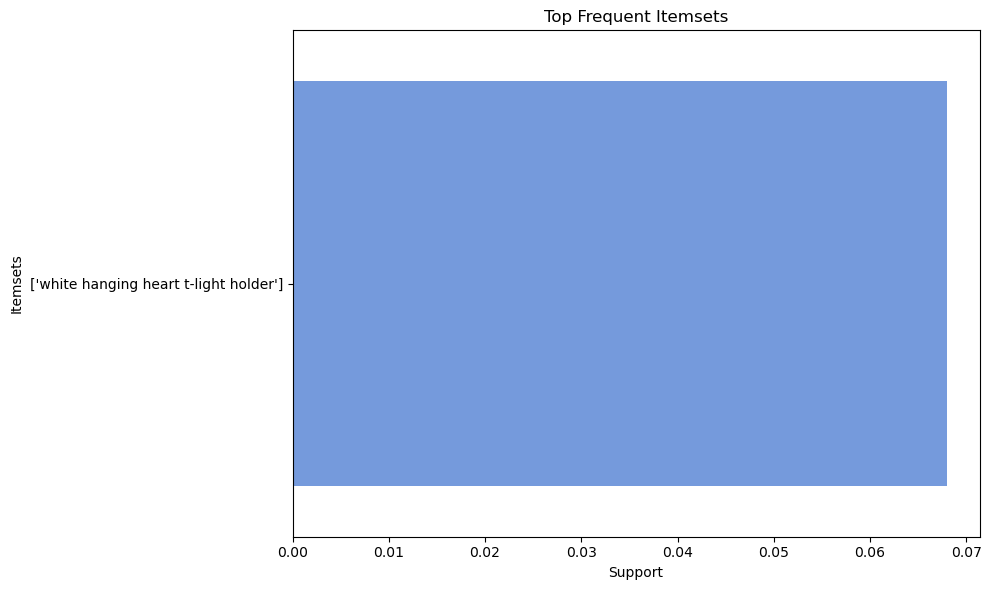

In [46]:
frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets_str', data=frequent_itemsets.sort_values(by="support", ascending=False).head(100), color='cornflowerblue')
plt.title('Top Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()

# Week 4: Insights, Recommendations, and Finalization

## Findings from Market Basket Analysis

Top-Selling Items

- "White Hanging Heart T-Light Holder" is the most frequently purchased item.

- A few products dominate sales, showing clear customer preferences.

Customer Purchase Behavior
- Most customers buy individual items with little overlap in combinations.

- Buying patterns are diverse and not strongly repetitive.

Business Opportunities
- Promote high-demand items more prominently.

- Bundle low-selling products with popular ones to increase visibility.

- Use insights to support inventory and marketing decisions.

## Key Takeaways

- Certain products consistently appear across a large number of transactions.

- Sales are concentrated among a small group of high-performing items.

- Customer baskets typically include individual or non-repetitive item combinations.

- There is potential to optimize product visibility and marketing based on purchasing patterns.

## Key Findings

- White Hanging Heart T-Light Holder is the most purchased item, indicating high demand.

- The top 50 items contribute a significant portion of the overall sales volume.

- Many products have low frequency, suggesting they are less preferred or less visible.

- Limited strong co-occurrence between items points to diverse customer behavior.

## Actionable Insights & Recommendations

- Promote best-sellers more aggressively through homepage placement, recommendations, or discounts.

- Bundle slow-moving products with top items to improve their visibility and drive sales.

- Monitor sales trends to dynamically update featured products based on recent popularity.

- Use insights to manage inventory, focusing on high-frequency items while reducing overstock of low-performers.



## Visualizations Summary

- Bar plots effectively highlighted the most frequently purchased items.

- Frequency distributions provided clear visibility into product performance.

- Item occurrence trends helped identify key contributors to sales.

- Visualizations supported easy communication of findings to stakeholders.

## Conclusion

The analysis shows that a few key products drive most sales, with customers displaying varied buying patterns. This highlights strong opportunities for promoting best-sellers and bundling lesser-known items. Leveraging these insights can boost both sales and customer engagement through smarter merchandising.

In [48]:
print('Missing values in dataset:\n', df.isnull().sum())

Missing values in dataset:
 BillNo               0
Itemname             0
Quantity             0
Present_Date         0
Date                 0
Time                 0
Price                0
CustomerID      133967
Country              0
dtype: int64


In [50]:
basket_data["Itemname"] = basket_data["Itemname"].astype(str)

In [52]:
numeric_cols = df.select_dtypes(include=["number"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

C:\Users\Vaamshikan M\AppData\Local\Temp\ipykernel_19964\3939697910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


C:\Users\Vaamshikan M\AppData\Local\Programs\Orange\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Vaamshikan M\AppData\Local\Programs\Orange\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\Vaamshikan M\AppData\Local\Programs\Orange\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See 

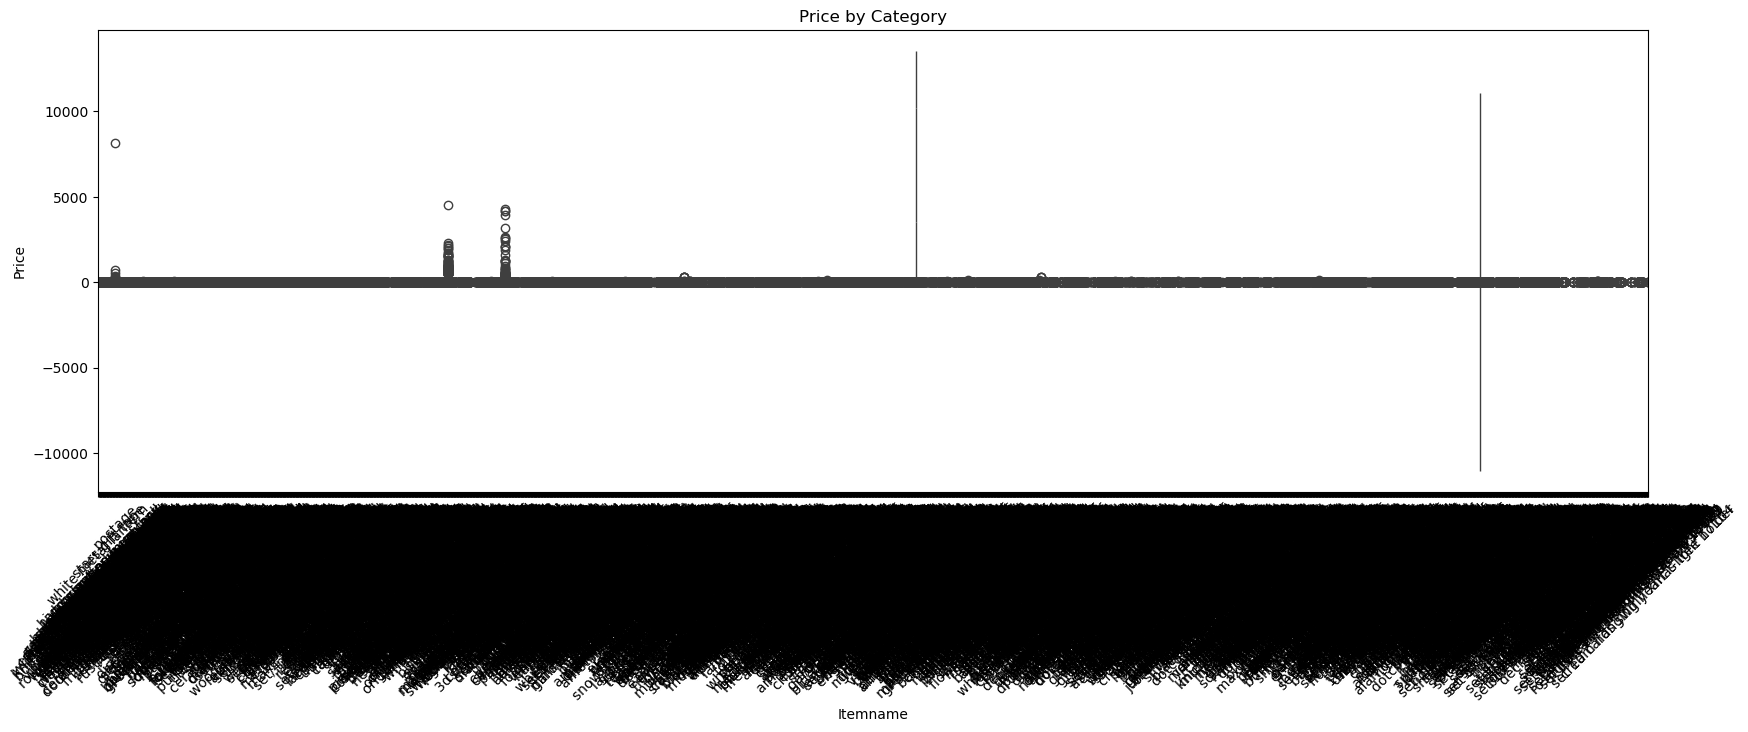

In [54]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=df['Itemname'], y=df['Price'])
plt.xticks(rotation=45)
plt.title('Price by Category')
plt.show()

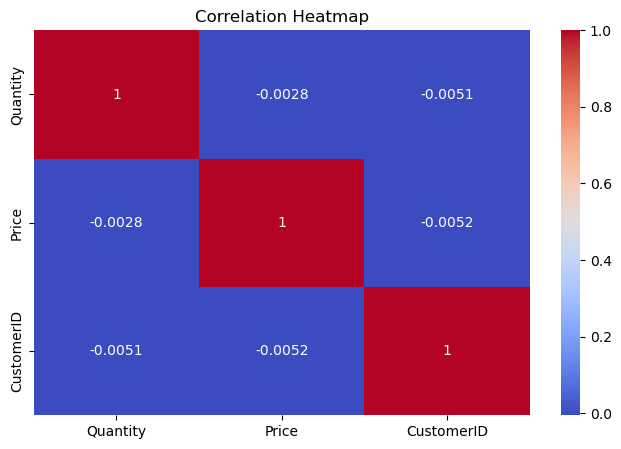

In [55]:
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()